# Obtaining Correct Likelihood

The point of this notebook is to show what the correct likelihood for a bunch of sampled data is. This problem arises because at first I was using a likelihood that made sense, but which is shown here to be incorrect. Thus this notebook serves as an eternal(!?) signpost saying "don't go this way".

## The Problem Summarized

Let's say we have a distribution of points (e.g. a mass function), whose counts are given by the function $g(m|\theta)$, which has the integral $q(m_{\rm min}|\theta)$ [the points are drawn above $m_{\rm min}$ up to $m=\infty$].

Then a simple way to envisage the likelihood of these points is the following:

$$ \ln \mathcal{L}_{\rm pdf} = \sum \ln (g_i/q), $$

i.e., the sum of the PDF at each point. In this case, the normalisation of $g$ cannot be directly recovered, but can be specified by equating $q$ with the total number of points. However, another way of thinking about it (often used in cluster counts) is to imagine binning all the points in very small bins, in which case each of the bins is a Poisson variable with 1 count. In this case, the likelihood is

$$ \ln \mathcal{L}_{\rm Ps} = -q + \sum \ln g_i. $$

So which one is correct? One way of answering this analytically is to take an ideal case. Let's say we can somehow draw samples in which we perfectly represent the underlying distribution. In this case, the sum turns into an integral which is weighted by the number of points at each $m$.

Say the points are drawn from the distribution with parameters $\theta = \theta'$, which we denote $g'$. Then the weight at each $m$ is just $g'(m)$, so the two likelihoods become

$$ \ln \mathcal{L}_{\rm pdf} = \int_{m_{\rm min}}^\infty g' \ln (g/q) dm, $$

and 

$$ \ln \mathcal{L}_{\rm Ps} = -q + \int_{m_{\rm min}}^\infty dm\  g' \ln g. $$

A simple test of whether these likelihoods are correct is that the maximum likelihood should be precisely at the parameters of the draw, i.e. $\theta'$. Thus the jacobian at the solution should be equivalently 0.

## A Simple Model

Let's use the simplest possible model that retains some resemblance to the MRP: a descending power-law:

$$ g(m) = A m^{\xi-1},$$

where $\xi<0$, $A>0$ and $m>0$.

In [1]:
from sympy import *
init_printing()

In [14]:
xi,xid = symbols(r"\xi,\xi'",negative=True)
m, A, Ad = symbols("m,A,A'",positive=True)
mmin = symbols(r"m_\rm{min}",positive=True)

In [3]:
g = A * m**(xi-1)
gd = Ad*m**(xid-1)

And $q$ is simply:

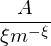

In [4]:
q = integrate(g,m)
q

### The pdf model

In the pdf model, the term $g/q$ is simply

In [7]:
gq = simplify(g/q)
gq

We can formally define the likelihood of the pdf model now:

In [18]:
lnl_pdf = simplify(integrate(gd*(log(xi) - log(m)),m)).subs(m,mmin)
lnl_pdf

             \xi'                                        
A'⋅m_\rm{min}    ⋅(\xi'⋅(log(\xi) - log(m_\rm{min})) + 1)
─────────────────────────────────────────────────────────
                              2                          
                          \xi'                           

The jacobian at the solution is simple to generate:

In [19]:
diff(lnl_pdf,A), simplify(diff(lnl_pdf,xi).subs(xi,xid))

⎛                \xi'⎞
⎜   A'⋅m_\rm{min}    ⎟
⎜0, ─────────────────⎟
⎜             2      ⎟
⎝         \xi'       ⎠

Clearly, this is not equivalent to 0, and depends on all input parameters.

### The Poisson model

We help the integrater out a little when defining this because apparently the integral is a bit tricky, but humanly speaking it is fairly clear. We use the integral of $g \ln m$ which was calculated in the previous section and add the rest to it:

In [20]:
int_gd_lnm = simplify(-lnl_pdf + integrate(gd*log(xi),m))
other = simplify(log(g) - (xi-1)*log(m))

In [24]:
lnl_poiss = simplify(combsimp(-q + integrate(gd*other,m) + (xi-1)*int_gd_lnm).subs(m,mmin))
lnl_poiss

        2           \xi                    \xi'                               
- A⋅\xi' ⋅m_\rm{min}    + A'⋅\xi⋅m_\rm{min}    ⋅(\xi⋅\xi'⋅log(m_\rm{min}) - \x
──────────────────────────────────────────────────────────────────────────────
                                                                2             
                                                        \xi⋅\xi'              

                                           
i + \xi'⋅log(A) - \xi'⋅log(m_\rm{min}) + 1)
───────────────────────────────────────────
                                           
                                           

Again, the jacobian at the solution is simple:

In [29]:
diff(lnl_poiss,A).subs({xi:xid,A:Ad}), simplify(diff(lnl_poiss,xi).subs({xi:xid,A:Ad}))

So it works.